In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from typing import List, Iterable, Dict
from tqdm import tqdm
from kmeans import *

K means
- Inductive
- General purpose 
- Suitable for flat geometries

We are trying to minimize the within cluster variance.

### Start by making clustering sample dataset

In [2]:
n_samples = 1000
n_features = 2
random_state = 0

In [3]:
X, y = make_blobs(n_samples=n_samples, n_features=n_features, random_state=random_state)
X_var, y_var = make_blobs(n_samples=n_samples, cluster_std=[1, 0.5, 2], n_features=n_features, random_state=random_state)

Text(0.5, 1.0, 'Uneven variance')

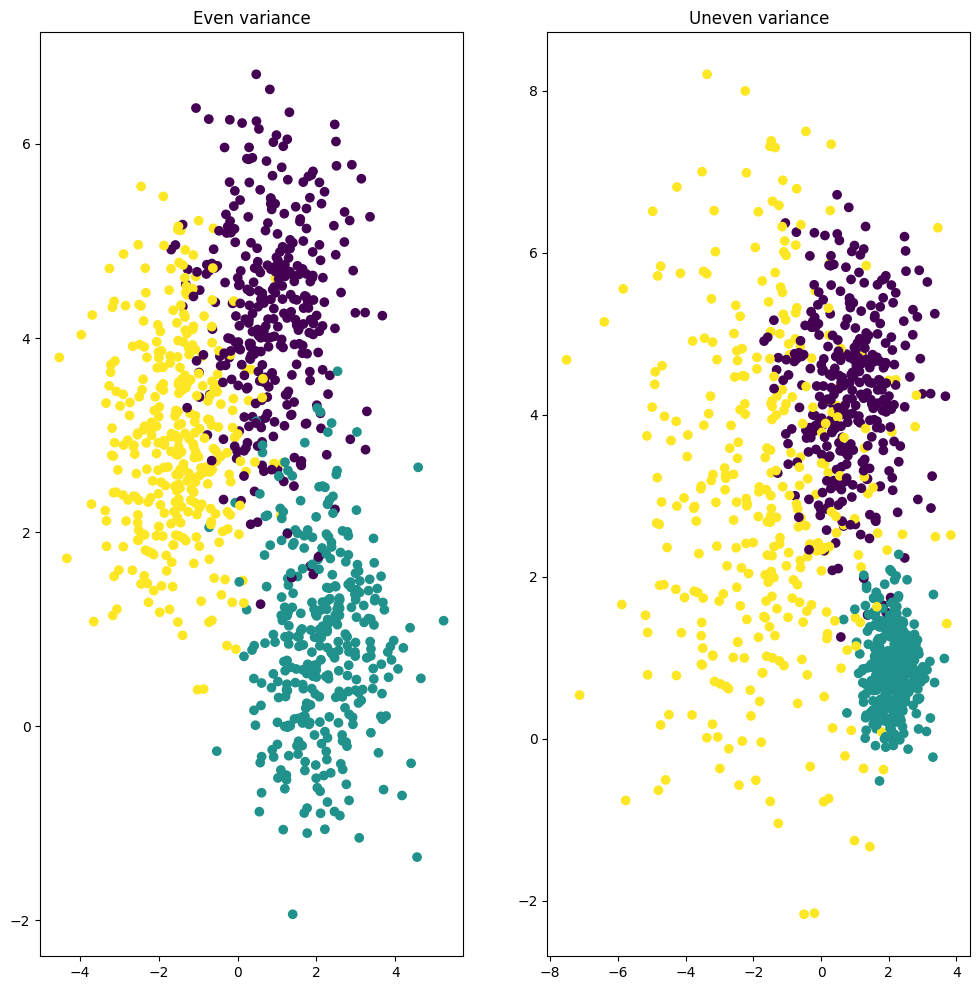

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))

ax[0].scatter(X[:, 0], X[:, 1], c=y)
ax[0].set_title('Even variance')

ax[1].scatter(X_var[:, 0], X_var[:, 1], c=y_var)
ax[1].set_title('Uneven variance')

#### Clustering

In [29]:
kmeans = KMeans(n_clusters=3)
%time assignments = kmeans.sikhao_aur_batao(X)

  5%|▌         | 5/100 [00:00<00:01, 77.32it/s]

Early stopping due to distance condition
CPU times: user 73.9 ms, sys: 2.98 ms, total: 76.9 ms
Wall time: 75.8 ms


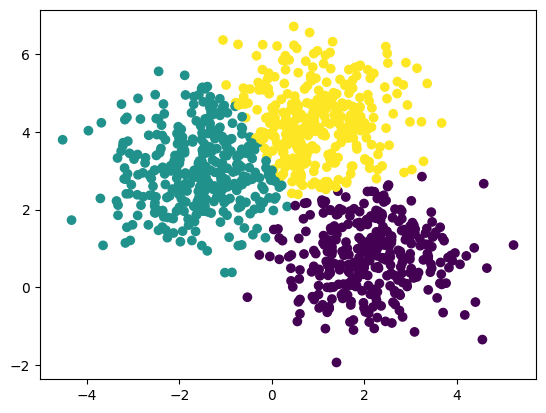

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=assignments)

In [20]:
from sklearn.cluster import KMeans as km

In [25]:
sklearn_model = km(n_clusters=3, max_iter=100)
%time sklearn_assignments = sklearn_model.fit_predict(X)

Text(0.5, 1.0, 'sklearn')

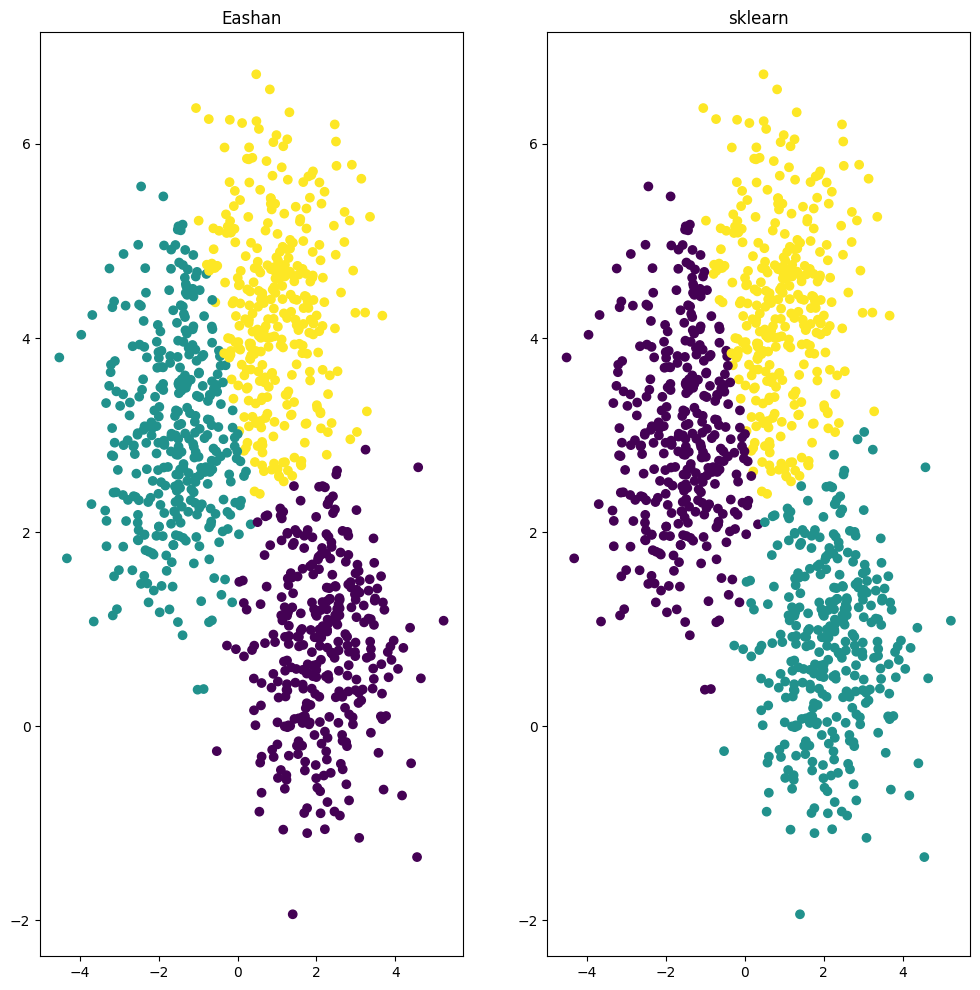

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))

ax[0].scatter(X[:, 0], X[:, 1], c=assignments)
ax[0].set_title('Eashan')

ax[1].scatter(X[:, 0], X[:, 1], c=sklearn_assignments)
ax[1].set_title('sklearn')

### Trying an sklearn dataset to see the difference

In [30]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [33]:
X.shape

(150, 4)

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

  0%|          | 0/100 [00:00<?, ?it/s]

  4%|▍         | 4/100 [00:00<00:00, 291.74it/s]

Early stopping due to distance condition
CPU times: user 17.5 ms, sys: 2.38 ms, total: 19.9 ms
Wall time: 18.8 ms


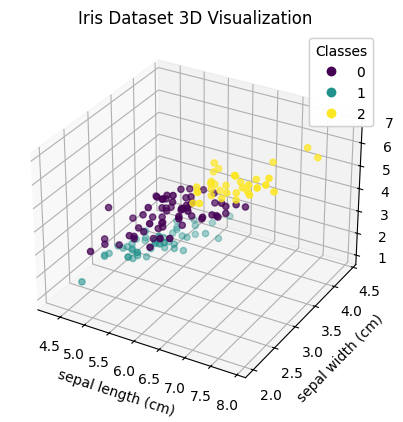

In [37]:
kmeans = KMeans(n_clusters=3)
%time assignments = kmeans.sikhao_aur_batao(X)


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Select three features to plot
x_feature = X[:, 0]  # For example, sepal length
y_feature = X[:, 1]  # For example, sepal width
z_feature = X[:, 2]  # For example, petal length

# Create a new figure
fig = plt.figure()

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using the selected features
scatter = ax.scatter(x_feature, y_feature, z_feature, c=assignments)

# Legend with target names
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)

# Labels and title
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_zlabel(iris.feature_names[2])
ax.set_title('Iris Dataset 3D Visualization')

# Show the plot
plt.show()


In [39]:
from sklearn import metrics

metrics.rand_score(y, assignments)

0.8859060402684564

In [42]:
metrics.adjusted_rand_score(y, assignments)

0.7455038681804481

CPU times: user 2.41 ms, sys: 1.85 ms, total: 4.26 ms
Wall time: 2.37 ms


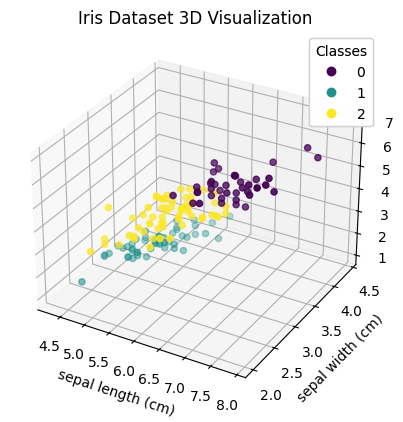

In [38]:
sklearn_model = km(n_clusters=3, max_iter=100)
%time sklearn_assignments = sklearn_model.fit_predict(X)


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Select three features to plot
x_feature = X[:, 0]  # For example, sepal length
y_feature = X[:, 1]  # For example, sepal width
z_feature = X[:, 2]  # For example, petal length

# Create a new figure
fig = plt.figure()

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using the selected features
scatter = ax.scatter(x_feature, y_feature, z_feature, c=sklearn_assignments)

# Legend with target names
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)

# Labels and title
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_zlabel(iris.feature_names[2])
ax.set_title('Iris Dataset 3D Visualization')

# Show the plot
plt.show()


In [40]:
metrics.rand_score(y, sklearn_assignments)

0.8737360178970918

In [41]:
metrics.adjusted_rand_score(y, sklearn_assignments)

0.7163421126838476

### What's a good distance threshold value? 

### Faster Kmeans? 

### Testing better init kmeans ++